In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from C:\Users\Viswas\Anaconda2\envs\py27\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\viswas\appdata\local\temp\tmptrwqje
  JVM stdout: c:\users\viswas\appdata\local\temp\tmptrwqje\h2o_Viswas_started_from_python.out
  JVM stderr: c:\users\viswas\appdata\local\temp\tmptrwqje\h2o_Viswas_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,"7 days, 22 hours and 54 minutes"
H2O cluster name:,H2O_from_python_Viswas_jedf3e
H2O cluster total nodes:,1
H2O cluster free memory:,3.533 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [2]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [3]:
prostate = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv")
prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()
prostate['RACE'] = prostate['RACE'].asfactor()
prostate['DCAPS'] = prostate['DCAPS'].asfactor()
prostate['DPROS'] = prostate['DPROS'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
prostate

ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
1,0,65,1,2,1,1.4,0,6
2,0,72,1,3,2,6.7,0,7
3,0,70,1,1,2,4.9,0,6
4,0,76,2,2,1,51.2,20,7
5,0,69,1,1,1,12.3,55.9,6
6,1,71,1,3,2,3.3,0,8
7,0,68,2,4,2,31.9,0,7
8,0,61,2,4,2,66.7,27.2,7
9,0,69,1,1,1,3.9,24,7
10,0,68,2,1,2,13,0,6


In [5]:
predictors = ["AGE", "RACE", "VOL", "GLEASON"]
response_col = "CAPSULE"

In [6]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(predictors, response_col, training_frame= prostate)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [7]:
print(glm_model.coef())

{u'GLEASON': 1.2503593867263172, u'VOL': -0.012783348665664449, u'AGE': -0.017888697161812357, u'Intercept': -6.675155394082711, u'RACE.2': -0.5899232636956414, u'RACE.1': -0.442787516808813}


In [8]:
print(glm_model.coef_norm())

{u'GLEASON': 1.3653341515811626, u'VOL': -0.2345440232267344, u'AGE': -0.11676080128780758, u'Intercept': -0.07610006436753279, u'RACE.2': -0.5899232636956414, u'RACE.1': -0.442787516808813}


In [9]:
glm_model._model_json['output']['coefficients_table']

Coefficients: glm coefficients



names,coefficients,std_error,z_value,p_value,standardized_coefficients
Intercept,-6.6751554,1.9317604,-3.4554780,0.0005493,-0.0761001
RACE.1,-0.4427875,1.3242308,-0.3343734,0.7380978,-0.4427875
RACE.2,-0.5899233,1.3734658,-0.4295143,0.6675490,-0.5899233
AGE,-0.0178887,0.0187019,-0.9565159,0.3388116,-0.1167608
VOL,-0.0127833,0.0075144,-1.7011907,0.0889072,-0.2345440
GLEASON,1.2503594,0.1561563,8.0071033,0.0000000,1.3653342


In [10]:
print(glm_model._model_json['output']['coefficients_table']['std_error'])

[1.9317603626604154, 1.3242308316851048, 1.3734657932878145, 0.01870193337051069, 0.007514353657915353, 0.15615627100849927]


In [11]:
print(glm_model._model_json['output']['coefficients_table']['p_value'])

[0.0005493180609458248, 0.7380978369202372, 0.6675489550762541, 0.33881164088847104, 0.08890718096586625, 1.2212453270876722e-15]


In [12]:
print(glm_model._model_json['output']['coefficients_table']['z_value'])

[-3.4554779791059094, -0.3343733631736688, -0.4295143472655973, -0.9565159284557903, -1.701190714147307, 8.007103260414452]


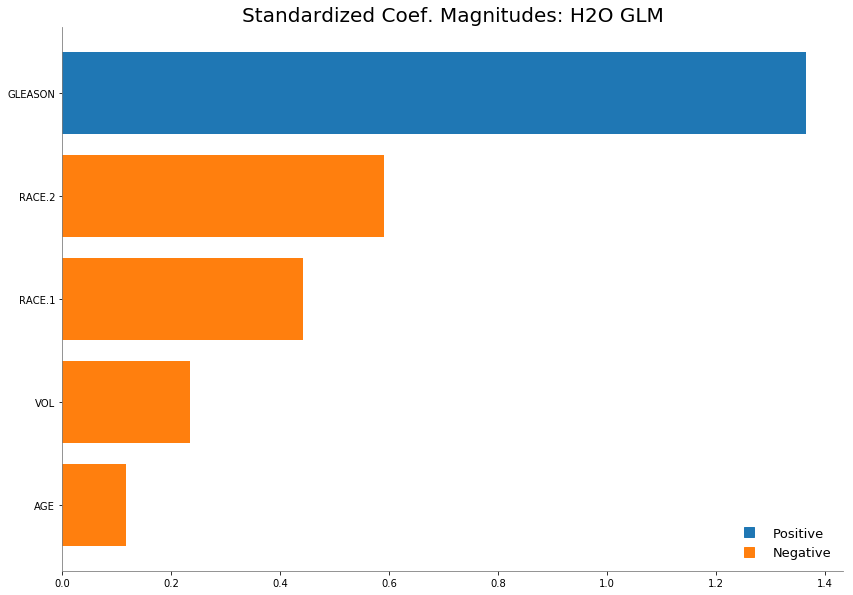

In [14]:
glm_model.std_coef_plot()